------------ A ---------------
[[5.  5.  4.5 4.5 5.  3.  2.  2.  0.  0. ]
 [4.2 4.7 5.  3.7 3.5 0.  2.7 2.  1.9 0. ]
 [2.5 0.  3.3 3.4 2.2 4.6 4.  4.7 4.2 3.6]
 [3.8 4.1 4.6 4.5 4.7 2.2 3.5 3.  2.2 0. ]
 [2.1 2.6 0.  2.1 0.  3.8 4.8 4.1 4.3 4.7]
 [4.7 4.5 0.  4.4 4.1 3.5 3.1 3.4 3.1 2.5]
 [2.8 2.4 2.1 3.3 3.4 3.8 4.4 4.9 4.  4.3]
 [4.5 4.7 4.7 4.5 4.9 0.  2.9 2.9 2.5 2.1]
 [0.  3.3 2.9 3.6 3.1 4.  4.2 0.  4.5 4.6]
 [4.1 3.6 3.7 4.6 4.  2.6 1.9 3.  3.6 0. ]]
------------ A_dash ---------------
[[2.1302451  0.        ]
 [1.90855208 0.        ]
 [0.76330919 2.04554006]
 [1.93591909 0.43939928]
 [0.29284564 2.34736241]
 [1.38549313 1.30484748]
 [0.98916647 2.01654687]
 [2.00874533 0.41018367]
 [0.79708903 1.78383317]
 [1.73753292 0.57528491]]
User id = 1, comp_1 score = 2.1302450968176347, comp_2 score = 0.0
User id = 2, comp_1 score = 1.90855207580354, comp_2 score = 0.0
User id = 3, comp_1 score = 0.7633091898638197, comp_2 score = 2.045540063147883
User id = 4, comp_1 score = 1.93591909

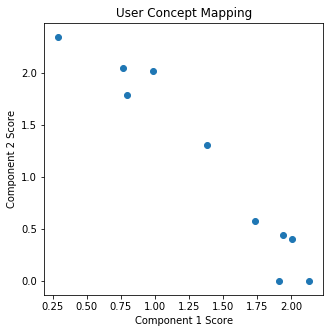

------------ F ---------------
[[2.209393   2.25650215 2.19165913 2.146008   2.31828471 0.58879522
  1.05542442 1.08847222 0.7257495  0.        ]
 [0.27288808 0.28980166 0.         0.79611388 0.26310495 1.76764541
  1.70495845 1.38300389 1.83692779 2.03730001]]


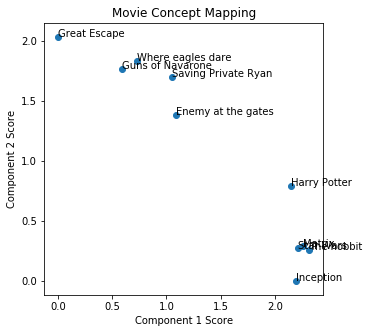

In [8]:
from collections import defaultdict
from sklearn.decomposition import NMF
import numpy as np
import matplotlib.pyplot as plt

# 数据集：电影影评数据
ratings = [
    [5., 5., 4.5, 4.5, 5., 3., 2., 2., 0., 0.],
    [4.2, 4.7, 5., 3.7, 3.5, 0., 2.7, 2., 1.9, 0.],
    [2.5, 0., 3.3, 3.4, 2.2, 4.6, 4., 4.7, 4.2, 3.6],
    [3.8, 4.1, 4.6, 4.5, 4.7, 2.2, 3.5, 3., 2.2, 0.],
    [2.1, 2.6, 0., 2.1, 0., 3.8, 4.8, 4.1, 4.3, 4.7],
    [4.7, 4.5, 0., 4.4, 4.1, 3.5, 3.1, 3.4, 3.1, 2.5],
    [2.8, 2.4, 2.1, 3.3, 3.4, 3.8, 4.4, 4.9, 4.0, 4.3],
    [4.5, 4.7, 4.7, 4.5, 4.9, 0., 2.9, 2.9, 2.5, 2.1],
    [0., 3.3, 2.9, 3.6, 3.1, 4., 4.2, 0.0, 4.5, 4.6],
    [4.1, 3.6, 3.7, 4.6, 4., 2.6, 1.9, 3., 3.6, 0.]
]
movie_dict = {
    1: 'Star Wars',
    2: 'Matrix',
    3: 'Inception',
    4: 'Harry Potter',
    5: 'The hobbit',
    6: 'Guns of Navarone',
    7: 'Saving Private Ryan',
    8: 'Enemy at the gates',
    9: 'Where eagles dare',
    10: 'Great Escape'
}

# 以下是模拟推荐系统的问题，通过用户对电影的评分，预测未知电影的评分。
A = np.asmatrix(ratings, dtype=float)

print("------------ A ---------------")
print(A)

nmf = NMF(n_components=2, random_state=1)
A_dash = nmf.fit_transform(A)

print("------------ A_dash ---------------")
print(A_dash)


# 检查降维后的矩阵
for i in range(A_dash.shape[0]):
    print(
        "User id = {}, comp_1 score = {}, comp_2 score = {}".format(
            i+1, A_dash[i][0], A_dash[i][1]
    ))

    
plt.figure(figsize=(5,5))
plt.title("User Concept Mapping")
plt.scatter(A_dash[:,0], A_dash[:,1])
plt.xlabel("Component 1 Score"); 
plt.ylabel("Component 2 Score")
plt.show()



# 检查成分矩阵
F = nmf.components_


print("------------ F ---------------")
print(F)



plt.figure(figsize=(5,5))

plt.title("Movie Concept Mapping")
plt.scatter(F[0,:], F[1,:])

plt.xlabel("Component 1 Score"); 
plt.ylabel("Component 2 Score")


for i in range(F[0,:].shape[0]):
    plt.annotate(movie_dict[i+1], (F[0,:][i], F[1,:][i]))

plt.show()

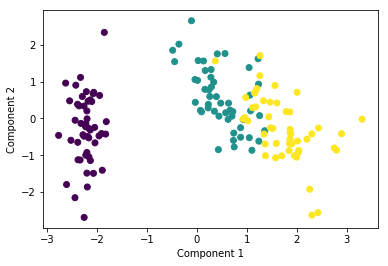

C:\Users\efnxqng\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:1046: ComplexWarning: Casting complex values to real discards the imaginary part
  self.index._engine.set_value(values, key, value)


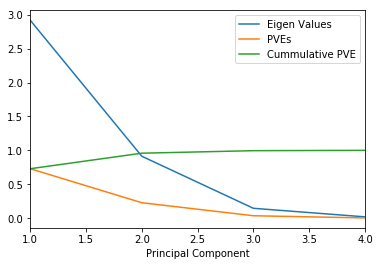

In [10]:
import scipy
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
import pandas as pd

# iris 数据集：3个分类，4维特征
iris = load_iris()

X, Y = iris['data'], iris['target']

print("---------- X ------------")
print(X)

print("---------- Y ------------")
print(Y)


# 标准化：由于 PCA 为无监督方法，只需标准化 features
x_s = scale(X, with_mean=True, with_std=True, axis=0)

print("---------- x_s ------------")
print(x_s)


# 计算相关矩阵：
x_corr = np.corrcoef(x_s.T)


print("---------- x_corr ------------")
print(x_corr)


# 从相关矩阵中计算特征值和特征向量：
eigenvalue, right_eigenvector = scipy.linalg.eig(x_corr)


print("---------- eigenvalue ------------")
print(eigenvalue)

print("---------- right_eigenvector ------------")
print(right_eigenvector)



# 选择 Top-2 特征向量（eig 函数输出降序排列）
w = right_eigenvector[:, 0:2]

print("---------- w ------------")
print(w)


# 使用特征向量作为权重进行PCA降维（投影到特征向量方向）
x_rd = x_s.dot(w)

print("----------x_rd ------------")
print(x_rd)


# 画出新的特征空间的散点图
plt.figure(facecolor='#ffffff')
plt.scatter(x_rd[:,0], x_rd[:,1], c=Y)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()



# 按照变准选取特征值
df = pd.DataFrame(
    np.random.randn(4,3), 
    columns=['Eigen Values', 'PVEs', 'Cummulative PVE'],
    index=pd.Index([1,2,3,4], name='Principal Component')
)

cum_pct, var_pct = 0, 0
for i, eigval in enumerate(eigenvalue):
    var_pct = round((eigval / len(eigenvalue)), 3)
    cum_pct += var_pct
    df['Eigen Values'][i+1] = eigval
    df['PVEs'][i+1] = var_pct
    df['Cummulative PVE'][i+1] = cum_pct

df.plot()
plt.show()
# 可以看到前两个主成分解释了 95.9% 的变异

The Dimension of Original Data: (480, 11967)
The Dimension of Transformed Data: (480, 1000)


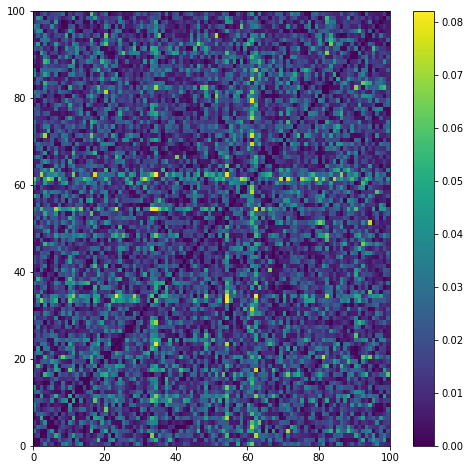

In [13]:
from sklearn.metrics import euclidean_distances
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.random_projection import GaussianRandomProjection

# 处理 20 个新闻组的文本数据，采用高斯随机映射
# 高斯随机矩阵是从正态分布 N(0, 1000^-1) 中采样生成的，1000是结果的维度

# 使用 sci.crypt 分类，将文本数据转换为向量表示
data = fetch_20newsgroups(categories=['alt.atheism'])

# 下载完会本地化，储存进 sklearn 模块

# 从 data 中创建一个 词-文档 矩阵，词频作为值
vectorizer = TfidfVectorizer(use_idf=False)
vector = vectorizer.fit_transform(data.data)

print(f'The Dimension of Original Data: {vector.shape}')

# 使用随机映射降维到 1000 维
gauss_proj = GaussianRandomProjection(n_components=1000)
gauss_proj.fit(vector)

# 将原始数据转换到新的空间
vector_t = gauss_proj.transform(vector)
print(f'The Dimension of Transformed Data: {vector_t.shape}')


# 检验是否保持了数据点的距离
org_dist = euclidean_distances(vector)
red_dist = euclidean_distances(vector_t)
diff_dist = abs(org_dist - red_dist)

# 上面的 diff_dist 返回一个 n x n 方阵，绘制成热力图：
plt.figure(figsize=(8, 8))
plt.pcolor(diff_dist[0:100, 0:100])
plt.colorbar()
plt.show()

---------- X ------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4

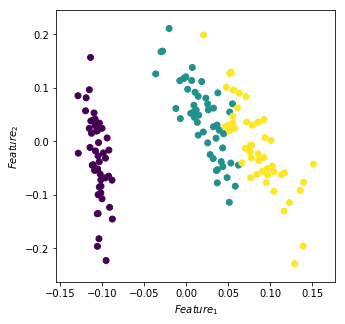

In [16]:
import scipy
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
import numpy as np

# Load dataset
iris = load_iris()
X, Y = iris['data'], iris['target']

print("---------- X ------------")
print(X)

# Standardize（如果所有变量度量单位一致，可以不必进行缩放，只需中心化）
x_s = scale(X, with_mean=True, with_std=False, axis=0)

print("---------- x_s ------------")
print(x_s)

# 通过 SVD 提取特征
U, S, V = np.linalg.svd(x_s, full_matrices=False)

print("---------- U ------------")
print(U)

# 选用前两个奇异向量表示原始数据矩阵
x_t = U[:, :2]

print("---------- x_t ------------")
print(x_t)

# 可视化降维后的数据集
plt.figure(figsize=(5,5))
plt.scatter(x_t[:,0], x_t[:,1], c=Y)
plt.xlabel('$Feature_1$'); plt.ylabel('$Feature_2$')
plt.show()

Automatically created module for IPython interactive environment
---------- images.shape ------------
(1797, 8, 8)
---------- X.shape ------------
(1797, 64)
---------- *images[0].shape ------------
8 8
---------- connectivity ------------
---------- X_reduced.shape ------------
(1797, 32)
---------- X_restored.shape ------------
(1797, 64)
---------- images_restored.shape ------------
(1797, 8, 8)


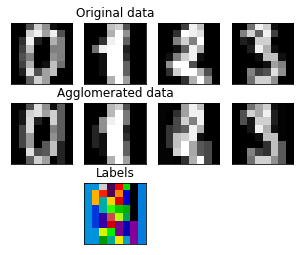

In [25]:
print(__doc__)

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, cluster
from sklearn.feature_extraction.image import grid_to_graph

digits = datasets.load_digits()
images = digits.images

print("---------- images.shape ------------")
print(images.shape)

X = np.reshape(images, (len(images), -1))

print("---------- X.shape ------------")
print(X.shape)

print("---------- *images[0].shape ------------")
print(*images[0].shape)

connectivity = grid_to_graph(*images[0].shape)

print("---------- connectivity ------------")
#print(connectivity)


agglo = cluster.FeatureAgglomeration(connectivity=connectivity,
                                     n_clusters=32)

agglo.fit(X)


X_reduced = agglo.transform(X)

print("---------- X_reduced.shape ------------")
print(X_reduced.shape)


X_restored = agglo.inverse_transform(X_reduced)


print("---------- X_restored.shape ------------")
print(X_restored.shape)


images_restored = np.reshape(X_restored, images.shape)

print("---------- images_restored.shape ------------")
print(images_restored.shape)


plt.figure(1, figsize=(4, 3.5))
plt.clf()
plt.subplots_adjust(left=.01, right=.99, bottom=.01, top=.91)

for i in range(4):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    if i == 1:
        plt.title('Original data')

    plt.subplot(3, 4, 4 + i + 1)
    plt.imshow(images_restored[i], cmap=plt.cm.gray, vmax=16,
               interpolation='nearest')
    if i == 1:
        plt.title('Agglomerated data')
    plt.xticks(())
    plt.yticks(())

    
plt.subplot(3, 4, 10)
plt.imshow(np.reshape(agglo.labels_, images[0].shape),
           interpolation='nearest', cmap=plt.cm.nipy_spectral)
plt.xticks(())
plt.yticks(())
plt.title('Labels')
plt.show()